# TF-IDF: Term Frequency-Inverse Document Frequency
* TF-IDF가 DTM보다 항상 좋은 성능을 보장하는 것은 아니지만, 많은 경우에서 DTM보다 더 좋은 성능을 얻을 수 있습니다.
* DTM을 구한 후 가중치를 부여하여 TF-IDF를 만듭니다.

## 1. TF-IDF(단어 빈도-역 문서 빋도)
* 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)을 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 두는 방법
* 주로 문서의 유사도를 구하는 작업, 검색 시스템에서 검색 결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 쓰임
* 문서를 d, 단어를 t, 문서의 총 개수를 n 이라고 가정
    1. TF(d,t): 특정 문서 d에서의 특정 단어 t의 등장 횟수

        DTM에서 이미 각 단어의 등장 빈도를 구했습니다.
    2. DF(t): 특정 단어 t가 등장한 문서의 수

        바나나란 단어가 문서2에서 100번 등장헀고, 문서 3에서 200번 등장했다고 하더라도 바나나의 df는 2가 됩니다.
    3. IDF(d,t): DF(t)에 반비례하는 수

        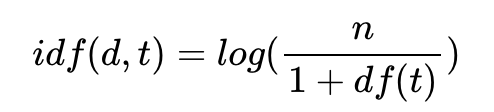
        IDF는 DF의 역수(n/df(t))로 사용하고 싶은 것에서 출발한 건 맞지만, 총 문서의 수 n이 커질수록, IDF의 값이 기하급수적으로 커지기 때문에 log를 사용합니다.
        * Log를 사용한 것과 안한 것의 차이:

            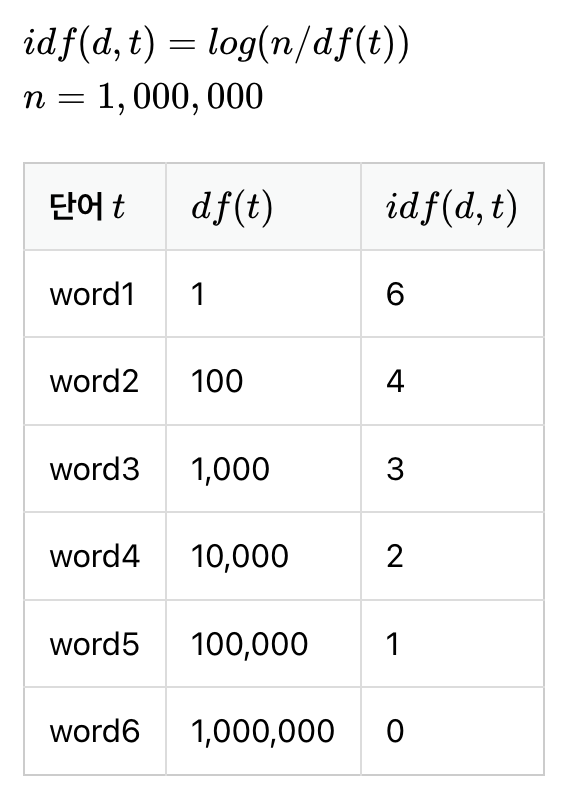
            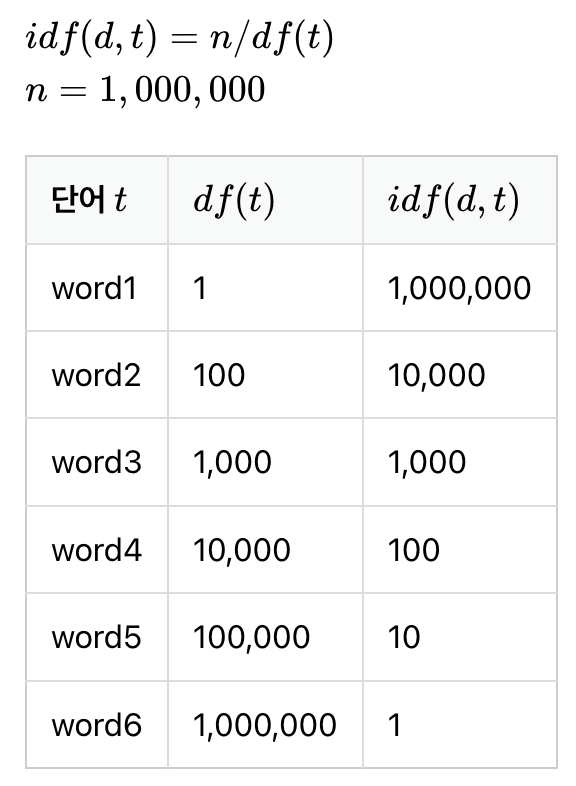
        
        불용어도 그렇지만 비교적 자주 쓰이지 않는 단어들조차 희귀 단어들과 비교하면 최소 수백 배는 더 자주 등장하는 편이기 때문에 log를 씌워주지 않으면 희귀 단어들에게 엄청난 가중치가 부여될 수 있습니다. 그리고 분모에 1을 더해준 이유는 특정 단어가 문서에 등장하지 않을 때 분모가 0이 되는 상황을 방지하기 위함입니다.

        TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단합니다. 그래서 TF-IDF 값이 낮으면 중요도가 낮고, 값이 크면 중요도가 큰 것을 의미합니다. 

        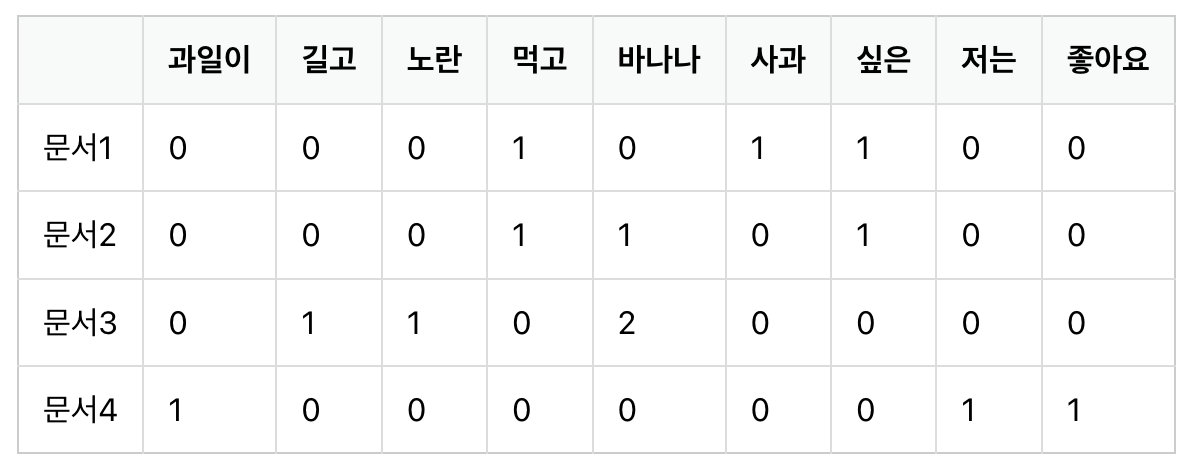
        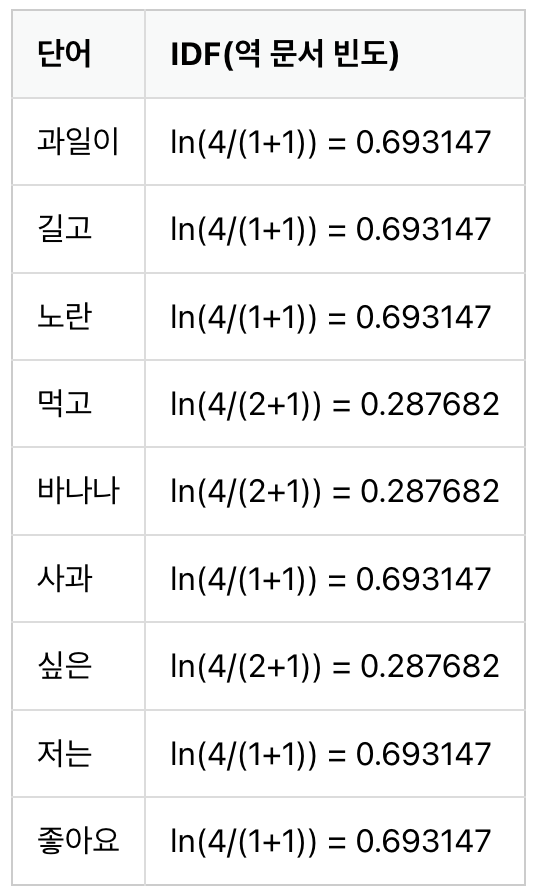
        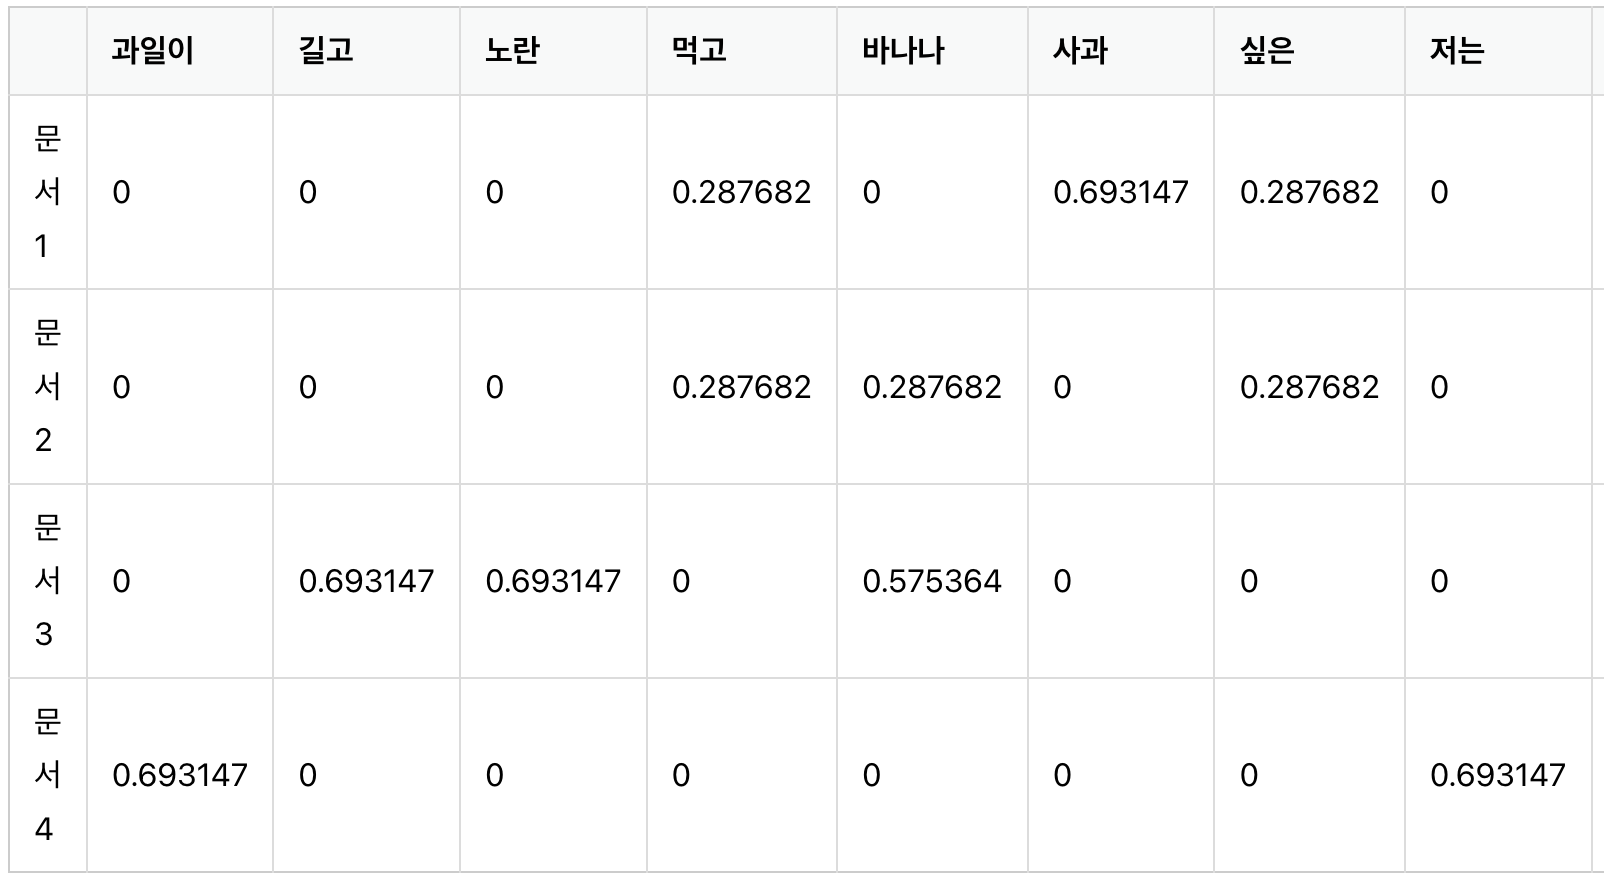
        
        TF-IDF는 DTM에서 IDF를 곱해준 것이기 때문에 위와 같은 표의 결과를 얻을 수 있습니다. 한 가지 주목할 점은 문서 2에서는 바나나를 한번 언급했지만, 문서 3에서 바나나를 두번 언급했기 때문에 문서 3에서의 바나나를 더욱 중요한 단어라고 판단하는 것입니다.

## 2. 파이썬으로 TF-IDF 직접 구현하기
* 실제 TF-IDF 구현을 제공하고 있는 많은 머신러닝 패키지들은 패키지마다 식이 조금씩 상이하지만, 위에서 배운 식과 다른 조정된 식을 사용합니다.
* 그 이유는 다음과 같은 상황이 있을 수 있기 때문입니다:
    
    n=4, df(t)=3 이라면, idf(d,t)=log(n/(df(t)+1))=0 이라서 더 이상 가중치의 역할을 수행하지 못합니다.

In [1]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [2]:
# 총 문서의 수
N = len(docs) 

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

def tfidf(t, d):
  return tf(t,d)* idf(t)

In [4]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [5]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [6]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


## 3. 사이킷런을 이용한 DTM과 TF-IDF 실습

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [8]:
# TfidfVectorizer는 IDF의 로그항의 분자에 1을 더해주며, 로그항에 1을 더해주고, TF-IDF에 L2 정규화 방법으로 값을 조정했습니다. 그러나 여전히 TF-IDF가 가진 의도는 갖고 있습니다.
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
